In [59]:
import pandas as pd
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import string
from gensim.models.phrases import Phrases, Phraser
import pyLDAvis
import pyLDAvis.gensim
from gensim.utils import lemmatize
from pprint import pprint
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [5]:
cnn = pd.read_csv("../data/cnn.csv")

In [6]:
cnn_abstract = cnn[['Abstract','Title']].dropna().reset_index(drop = True)

In [7]:
clean_text = []
for index in range(len(cnn_abstract)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]+', ' ', cnn_abstract['Abstract'][index])

    #Convert to lowercase
    text = text.lower()
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    text = " ".join(text)
    clean_text.append(text)
    
cnn_abstract['clean_text'] = clean_text

In [55]:
def sent_to_words(text):
    for sentence in text:
        yield(gensim.utils.simple_preprocess(str(sentence)))  # deacc=True removes punctuations

words_text = list(sent_to_words(clean_text))

print(words_text[:2])

[['incomplete', 'surgical', 'resection', 'of', 'head', 'and', 'neck', 'squamous', 'cell', 'carcinoma', 'hnscc', 'is', 'the', 'most', 'common', 'cause', 'of', 'local', 'hnscc', 'recurrence', 'currently', 'surgeons', 'rely', 'on', 'pre', 'operative', 'imaging', 'direct', 'visualization', 'palpation', 'and', 'frozen', 'section', 'to', 'determine', 'the', 'extent', 'of', 'tissue', 'resection', 'it', 'has', 'been', 'demonstrated', 'that', 'optical', 'coherence', 'tomography', 'oct', 'minimally', 'invasive', 'non', 'ionizing', 'near', 'infrared', 'mesoscopic', 'imaging', 'modality', 'can', 'resolve', 'subsurface', 'differences', 'between', 'normal', 'and', 'abnormal', 'head', 'and', 'neck', 'mucosa', 'previous', 'work', 'has', 'utilized', 'oct', 'imaging', 'which', 'is', 'limited', 'to', 'the', 'evaluation', 'of', 'small', 'regions', 'of', 'interest', 'generated', 'frame', 'by', 'frame', 'oct', 'technology', 'is', 'capable', 'of', 'performing', 'rapid', 'volumetric', 'imaging', 'but', 'the',

In [9]:
stop_words = stopwords.words('english')
print(len(stop_words))
remove_words = ['overall', 'perform' , 'model','use', 'data','result','using','used','feature','proposed','evaluate','performance','algorithm',
                   'lr','ext','respective','respectively', 'accuracy', 'relatively','small','challenge','validation','layer','better','three','detection',
                  'show','cnn','li', 'small','show','development','training','transfer','twos','cnns','pre','auroc','two','method','parameters',
                   'segmentation','convolutional', 'neural', 'network', 'show','task','compare','state','study', 'retrospective', 'datum','prediction','art',
                   'require', 'focus', 'base', 'approach', 'paper', 'present', 'fall', 'due', 'recent', 'exponential', 'increase','analysis', 'analysis'
                  'specificity','basis', 'function', 'kernel', 'area', 'curve', 'auc', 'may', 'useful','explore', 'two', 'different','test','models','system',
                   'deep', 'learning', 'approach','require','may', 'useful','information', 'basis','obtain','methods','achieve','level',
                   'al', 'research', 'grid', 'also','features', 'techniques', 'hard', 'parameter', 'sharing', 'cross', 'stitch', 'train', 'word', 'level', 
                'however','search', 'currently','trained','article','analytic','datasets','fold', 'cross', 'propose','compared','based', 'classification',
                'results','dataset','multiple', 'time', 'set','experiment','achieved','information','machine','offers', 'high','networks','superior', 'classification', 'accuracy', 'for', 'automated', 'coding', 'support']
remove_words= list(set(remove_words))
stop_words.extend(remove_words)
print(len(remove_words))
print(len(stop_words))

179
125
304


In [ ]:
# p=Counter(remove_words)
# x=(pd.Series(p))
# print(x)
# y = list(set(remove_words))
# print(y)

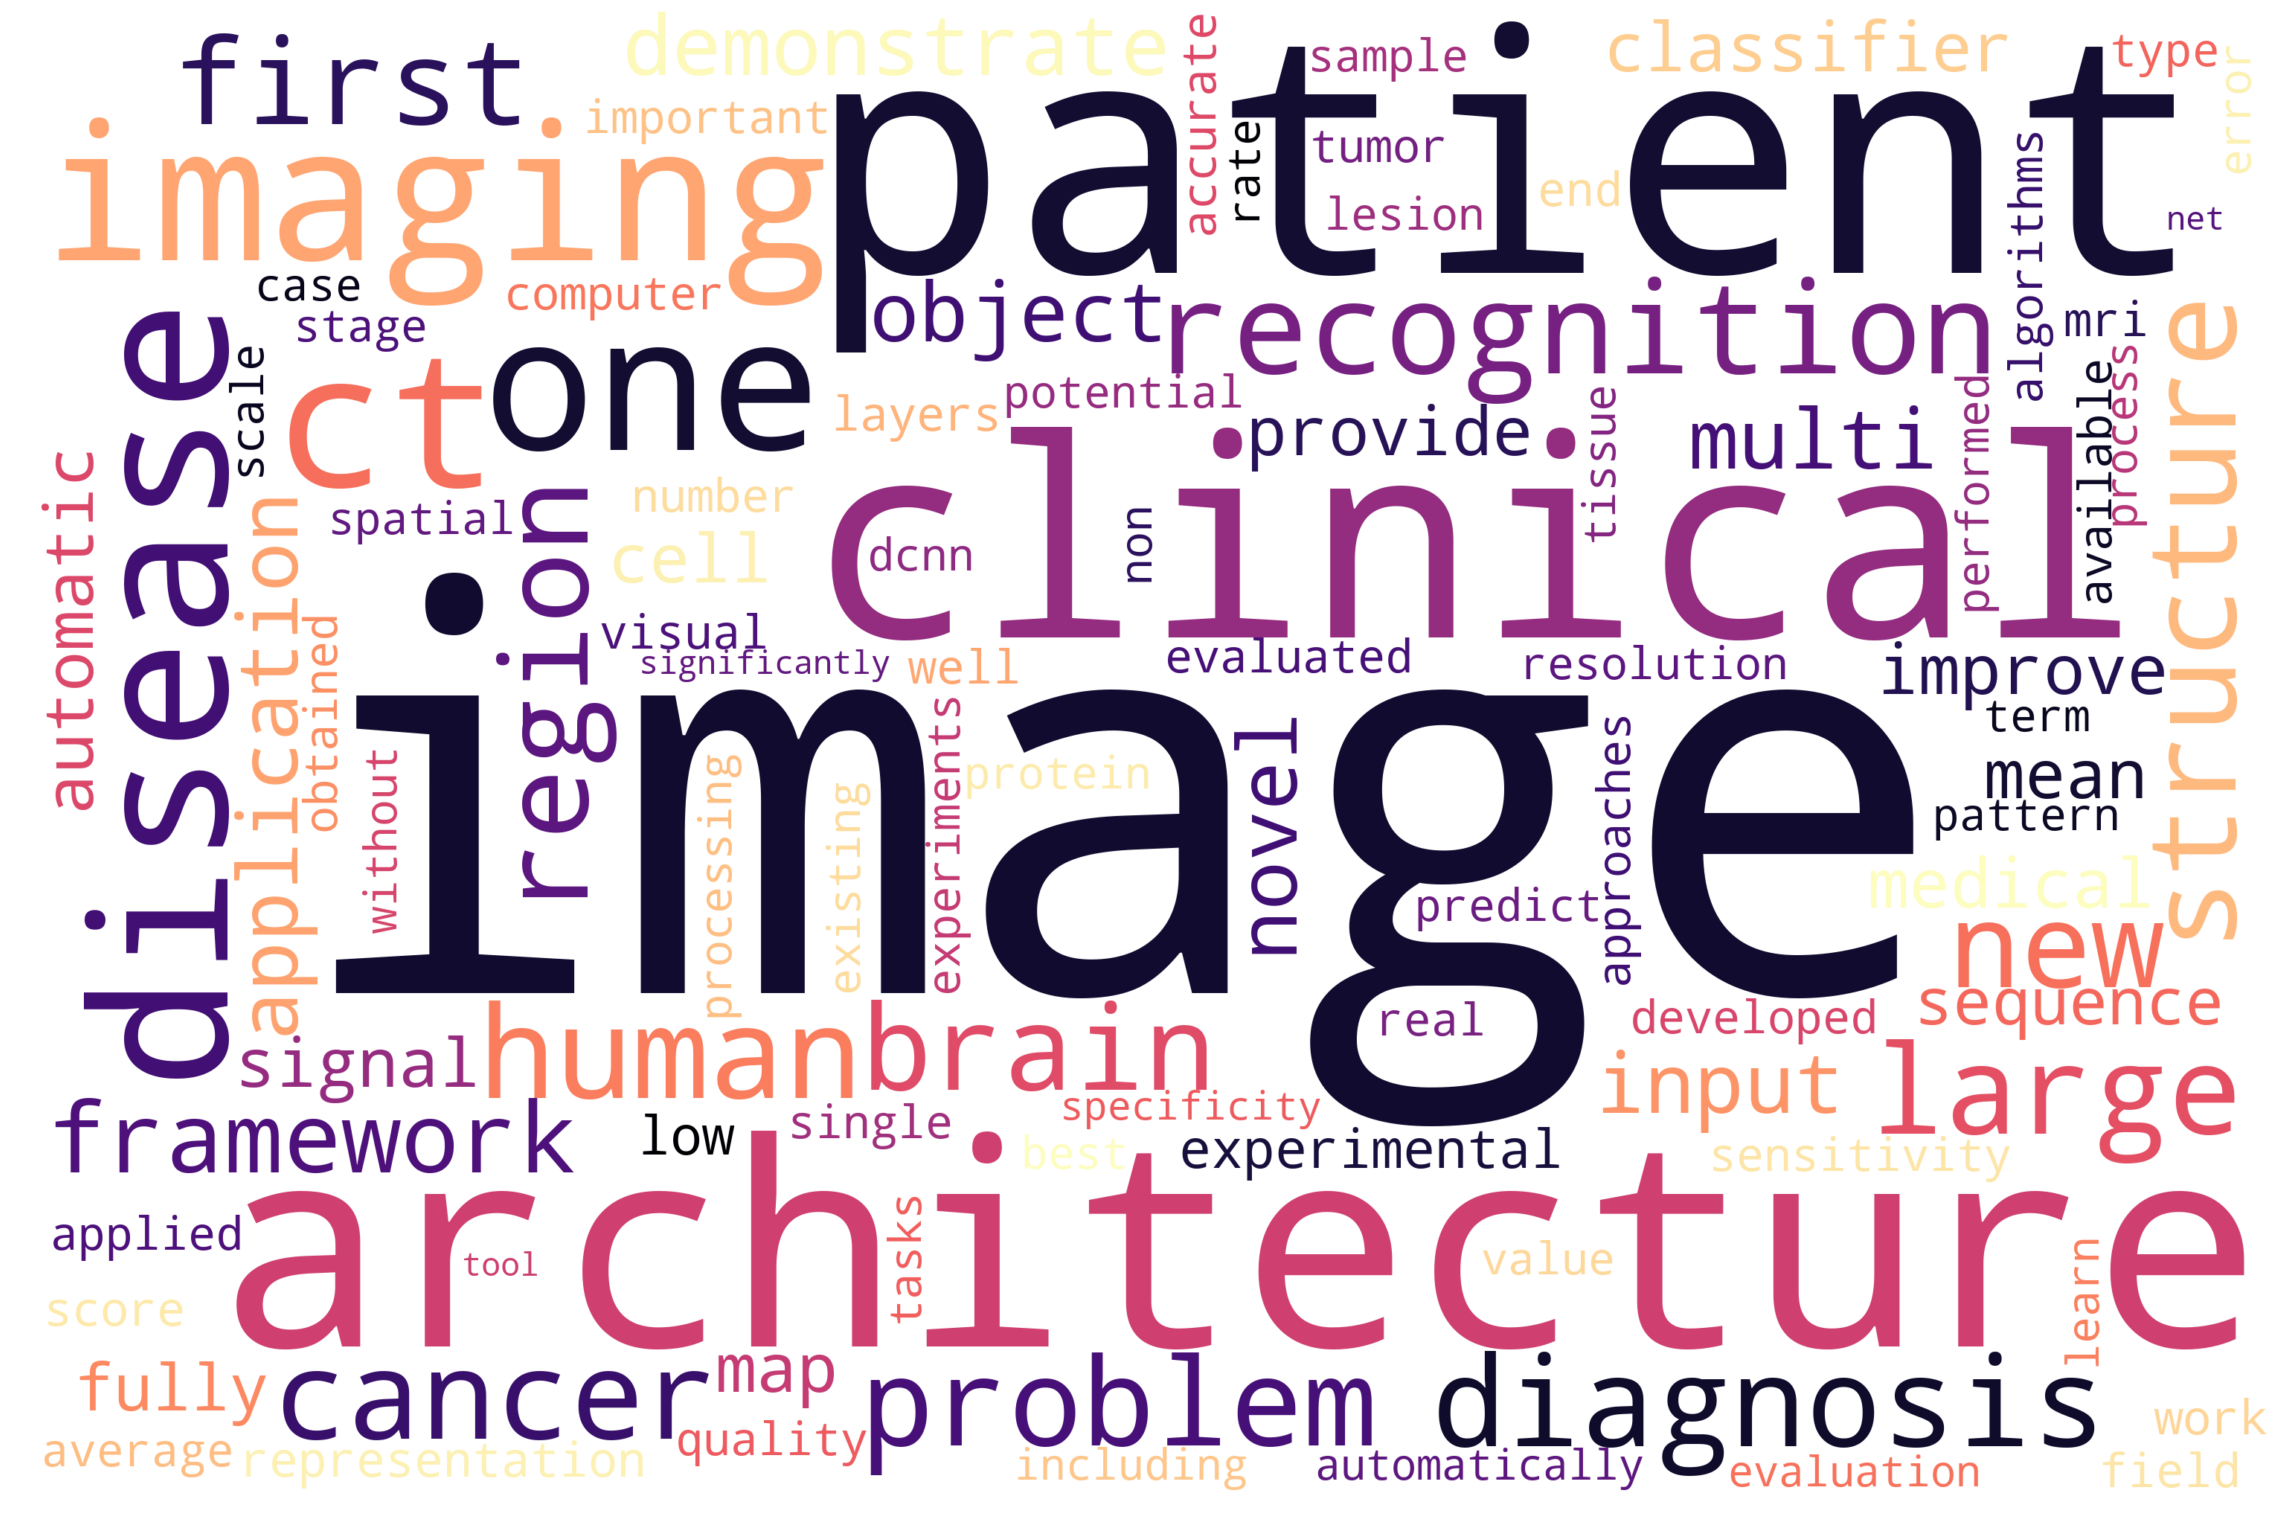

In [10]:
#Word cloud of 100 words in the entire clean text
wordcloud = WordCloud(width = 3000,
    height = 2000,background_color='white',colormap=plt.cm.magma,
                          stopwords=stop_words,
                          max_words=100,
                           
                          random_state=42,collocations=False
                         ).generate(str(clean_text))

#print(wordcloud)
plt.figure(figsize = (40, 30), edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("word2.png")
plt.show()

In [56]:
#cnn_abstract.clean_text= cnn_abstract.clean_text.str.split()
#cnn_abstract['clean_text'] = data_words.apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [66]:
minus_stopwords = remove_stopwords(words_text)

          Bigram        Freq
0         images  125.493783
1          image  109.221424
2    recognition   51.741486
3             ct   48.635307
4        imaging   46.326398
5          brain   46.282132
6      diagnosis   45.177371
7       clinical   44.944881
8       patients   44.778949
9          human   43.876009
10        cancer   42.640620
11         multi   41.199744
12         large   40.775336
13           one   40.323265
14           new   39.972117
15     framework   39.889552
16  architecture   39.751991
17       medical   39.546356
18           end   38.861101
19       disease   37.436053
20        layers   37.114722
21        visual   37.021870
22         first   36.792822
23           mri   36.678704
24        object   36.365803
25         novel   36.129580
26       problem   35.635930
27     automatic   35.563760
28         input   35.138949
29           low   34.745548
30         fully   34.598080
31    algorithms   34.534591
32  experimental   34.220854
33    approach

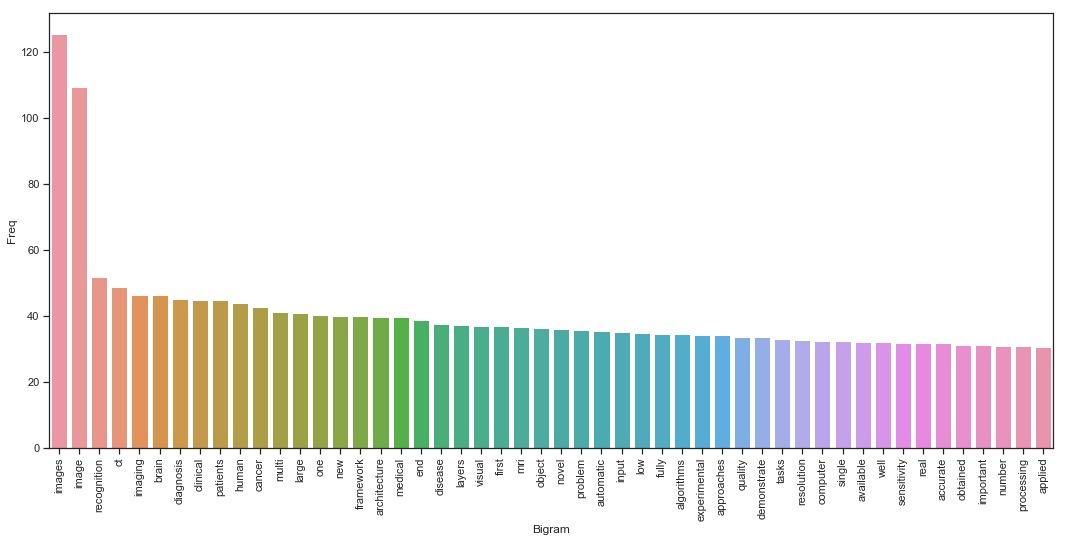

In [60]:
#Most frequently occuring bigrams in the data. plot both bar plot and word cloud of bigrams in the data 
def top_bi_grams(clean_text, n=None):
    
    
    vectorizer = TfidfVectorizer(ngram_range = (1,2), min_df = 5,stop_words=stop_words).fit(clean_text)
    bows = vectorizer.transform(clean_text)
    sumwords = bows.sum(axis=0) 
    words_freq = [(word, sumwords[0, idx]) for word, idx in     
                  vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top_bigrams = top_bi_grams(clean_text, n=50)
top_bigrams_df = pd.DataFrame(top_bigrams)
top_bigrams_df.columns=["Bigram", "Freq"]
print(top_bigrams_df)

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(18,8)}, style ='white' )
sns.set_style("ticks")

h=sns.barplot(x="Bigram", y="Freq", data=top_bigrams_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90);

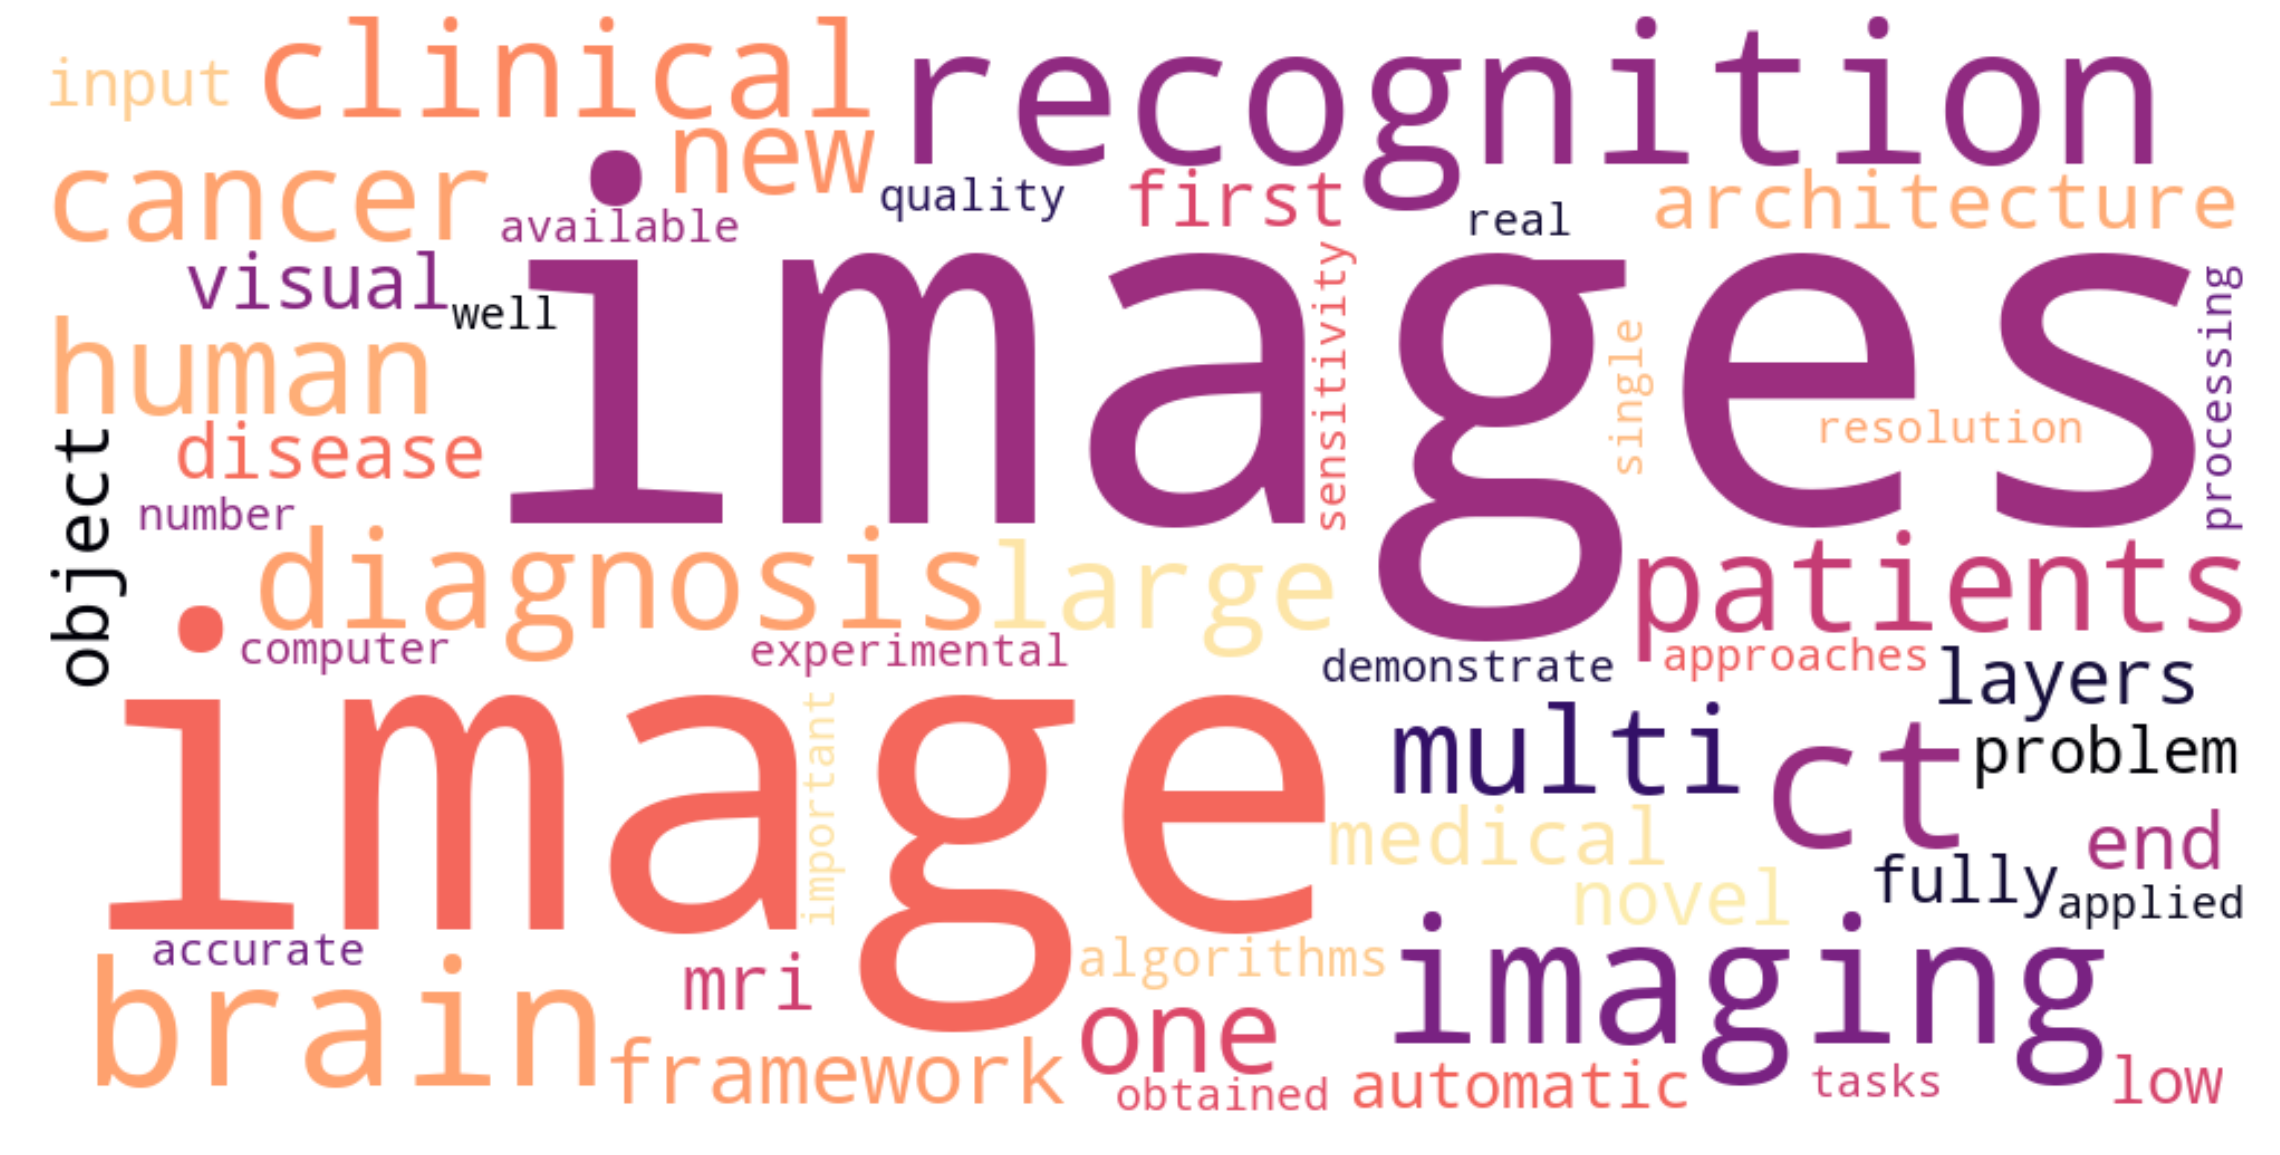

In [61]:
bigrams = {}
for w, x in top_bigrams_df.values:
    bigrams[w] = x
wordcloud = WordCloud(width = 1000,
    height = 500,background_color='white',colormap=plt.cm.magma,margin=5,
                     min_word_length =2, relative_scaling=1, collocations=False)
wordcloud.generate_from_frequencies(bigrams)
plt.figure(figsize = (40, 30),
    
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [68]:
bigram = Phrases(minus_stopwords, min_count=5, threshold=100)
trigram = Phrases(minus_stopwords, min_count=5, threshold=100)
bigrams_mod = Phraser(bigram)
trigrams_mod = Phraser(trigram)

In [69]:
def bigrams(texts):
    return [bigrams_mod[doc] for doc in texts]
words_bigrams = bigrams(minus_stopwords)

def trigrams(texts):
    return [trigrams_mod[doc] for doc in texts]
words_trigrams = trigrams(minus_stopwords)

In [70]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [71]:
data_lemme = lemmatization(words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [76]:
# Create Dictionary
id2word = corpora.Dictionary(words_bigrams)

# Create Corpus
texts = words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:2])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 3), (22, 2), (23, 1), (24, 1), (25, 4), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 2), (40, 3), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1)], [(15, 2), (73, 5), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 3), (80, 1), (81, 1), (82, 1), (83, 5), (84, 1), (85, 2), (86, 1), (87, 2), (88, 1), (89, 1), (90, 2), (91, 2), (92, 1), (93, 1), (94, 5), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 5), (108, 2), (109, 1

In [77]:
id2word[73]

'across'

In [78]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=19, 
                                           random_state=100,
                                           update_every=1,
                                           
                                           chunksize=1000,
                                           passes=25,
                                           alpha='auto',
                                           per_word_topics=True)

In [79]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.059*"images" + 0.040*"cell" + 0.032*"tumor" + 0.031*"image" + '
  '0.020*"cancer" + 0.018*"cells" + 0.017*"tissue" + 0.012*"regions" + '
  '0.011*"microscopy" + 0.011*"tumors"'),
 (1,
  '0.010*"image" + 0.009*"framework" + 0.008*"layers" + 0.008*"novel" + '
  '0.007*"problem" + 0.007*"local" + 0.007*"experimental" + 0.006*"input" + '
  '0.006*"first" + 0.006*"structure"'),
 (2,
  '0.068*"sequence" + 0.022*"sequences" + 0.019*"proteins" + 0.014*"dna" + '
  '0.014*"predict" + 0.014*"gene_expression" + 0.011*"computational" + '
  '0.010*"motifs" + 0.010*"com" + 0.010*"interactions"'),
 (3,
  '0.018*"recognition" + 0.017*"signals" + 0.016*"eeg" + 0.016*"activity" + '
  '0.014*"signal" + 0.010*"spatial" + 0.009*"sensor" + 0.009*"temporal" + '
  '0.007*"spectral" + 0.006*"sensors"'),
 (4,
  '0.056*"image" + 0.042*"images" + 0.028*"quality" + 0.023*"noise" + '
  '0.023*"resolution" + 0.018*"reconstruction" + 0.016*"low" + 0.010*"imaging" '
  '+ 0.009*"space" + 0.008*"denoising"'),
 

In [80]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.502163480008008

Coherence Score:  0.48111372224917565


In [81]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.225652  0.135746       1        1  25.530907
7     -0.226969  0.086446       2        1  14.162215
13    -0.140434 -0.157599       3        1  11.614155
8     -0.186916 -0.114170       4        1   9.578715
3     -0.064915  0.066891       5        1   4.948730
16    -0.105428 -0.230950       6        1   4.686212
10    -0.042874  0.086010       7        1   4.622052
4     -0.098751  0.016691       8        1   4.506105
9     -0.108077  0.119589       9        1   3.747378
5     -0.016307  0.218340      10        1   3.157215
0     -0.083408 -0.129590      11        1   2.863467
17     0.097780 -0.093954      12        1   2.094056
2      0.151155  0.093265      13        1   1.594742
11     0.148498 -0.099826      14        1   1.392085
12     0.166891 -0.027702      15        1   1.389631
15     0.094061 -0.049965      16        1   1.367455
14     0.196446  0.026601      17        1   1.122977
18     0.213774  0.041833      18        1   1.007930
6      0.231126  0.012345      19        1   0.613983, topic_info=     Category         Freq         Term        Total  loglift  logprob
24    Default  5558.000000       images  5558.000000  30.0000  30.0000
23    Default  4402.000000        image  4402.000000  29.0000  29.0000
211   Default   909.000000        brain   909.000000  28.0000  28.0000
1319  Default  1524.000000  recognition  1524.000000  27.0000  27.0000
1397  Default  1278.000000           ct  1278.000000  26.0000  26.0000
...       ...          ...          ...          ...      ...      ...
994   Topic19    22.231567    cognitive    51.469803   4.2535  -4.7556
5090  Topic19    17.514040       injury    51.900345   4.0066  -4.9941
1041  Topic19    24.224014       scores   266.456360   2.6951  -4.6698
1652  Topic19    17.629343      scoring   126.704773   3.1207  -4.9876
3881  Topic19    13.541350    diffusion    26.432831   4.4241  -5.2514

[1109 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1261      3  0.989228  abnormalities
5452     18  0.137702             ac
5452     19  0.826212             ac
4437     17  0.973242            acc
1595      5  0.983003  accelerometer
...     ...       ...            ...
938       2  0.123879          years
938       3  0.077424          years
938       6  0.179624          years
938       7  0.037164          years
938      12  0.405703          years

[2381 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 14, 9, 4, 17, 11, 5, 10, 6, 1, 18, 3, 12, 13, 16, 15, 19, 7])

In [83]:
pyLDAvis.save_html(vis, '../data/lda.html')

In [ ]:
cnn_abstract[cnn_abstract.clean_text.str.contains('text|analysis|natural language processing|nlp')]

In [ ]:
cnn_abstract.iloc[53][2]